In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!git clone https://github.com/kirthika-natarajan/basic_concepts.git

Cloning into 'basic_concepts'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [3]:
print(cv2.__version__)
print(np.__version__)

4.1.2
1.21.6


# Spatial Transformations in images

In [8]:
org_bgr =cv2.imread('basic_concepts/clock_1.jpeg')
org_gy  =cv2.cvtColor(org_bgr, cv2.COLOR_BGR2GRAY)
org_rgb =cv2.cvtColor(org_bgr,cv2.COLOR_BGR2RGB) 

## cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst
   **src** – input image. 
   **dst** – output image of the same size and the same number of channels as src.
   **ddepth** - 
   desired depth of the destination image; if it is negative, it will be the same as src.depth(); the following    combinations of src.depth() and ddepth are supported:

        src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
        src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
        src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
        src.depth() = CV_64F, ddepth = -1/CV_64F

when ddepth=-1, the output image will have the same depth as the source.
   **kernel**- 
   convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you  >>>want to apply different kernels to different channels, split the image into separate color planes using split() and >>>process them individually.
   

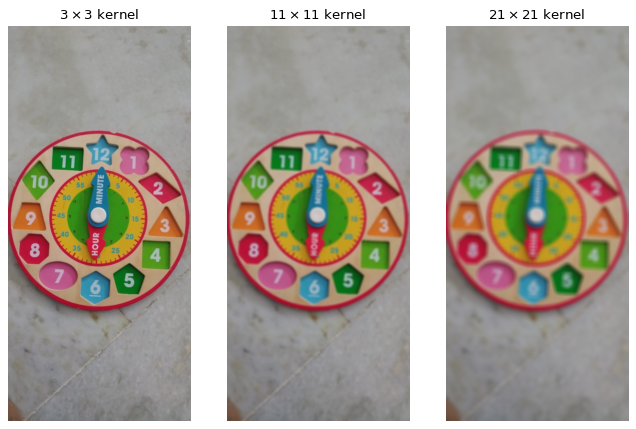

In [9]:
kernel_3 = (1/9.0)*np.ones((3,3),dtype=np.float32)
blur_3 = cv2.filter2D(org_rgb,-1,kernel_3)
kernel_11 = (1/121.0)*np.ones((11,11),dtype=np.float32)
blur_11 = cv2.filter2D(org_rgb,-1,kernel_11)
kernel_21 = (1/441.0)*np.ones((21,21),dtype=np.float32)
blur_21 = cv2.filter2D(org_rgb,-1,kernel_21)

plt.figure(num=None,figsize=(10,8),dpi=80)
plt.subplot(131)
plt.title(r'$3 \times 3$ kernel')
plt.imshow(blur_3[:]/255.0)
plt.axis('off')
plt.subplot(132)
plt.imshow(blur_11[:]/255.0)
plt.title(r'$11 \times 11$ kernel')
plt.axis('off')
plt.subplot(133)
plt.imshow(blur_21[:]/255.0)
plt.title(r'$21 \times 21$ kernel')
plt.axis('off')


plt.show()



## Edge Detection

In [15]:
mask=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) # Change it to -1 5 -1(Sharpening filter)
mask.dtype

dtype('int64')

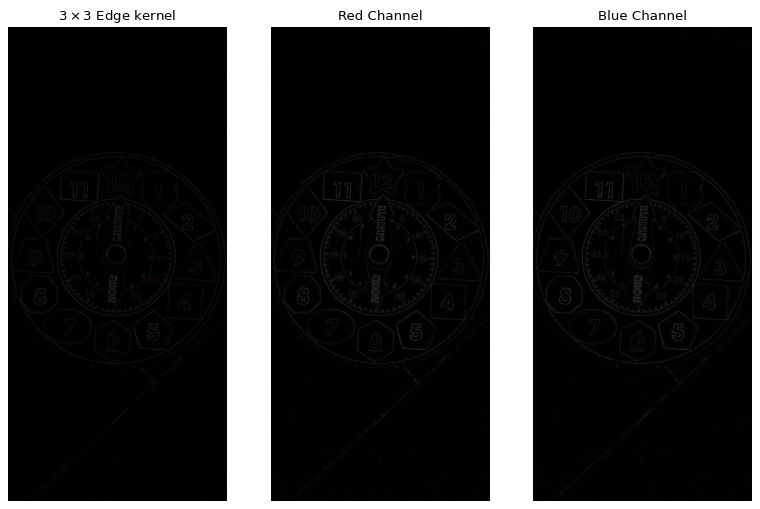

In [16]:
mask_3=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
edge_3 = cv2.filter2D(org_rgb,-1,mask_3)
plt.figure(num=None,figsize=(12,12),dpi=80)
plt.subplot(131)
plt.title(r'$3 \times 3$ Edge kernel')
plt.imshow(edge_3[:]/255.0)
plt.axis('off')
plt.subplot(132)
plt.title('Red Channel')
plt.imshow(edge_3[:,:,0]/255.0,cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.title('Blue Channel')
plt.imshow(edge_3[:,:,2]/255.0,cmap='gray')
plt.axis('off')
plt.show()

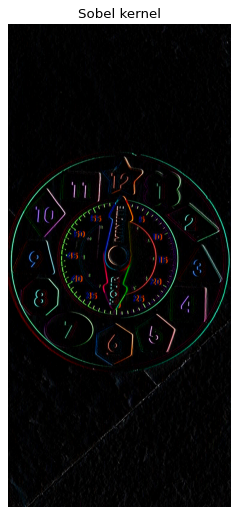

In [12]:
sobel = cv2.Sobel(org_rgb,-1,1,0,21)
plt.figure(num=None,figsize=(8,8),dpi=80)
plt.title('Sobel kernel')
plt.imshow(sobel[:]/255.0)
plt.axis('off')
plt.show()

In [13]:
# generate gaussian noise
gaussNoise = np.zeros((org_rgb.shape),dtype=np.uint8)
mean=0
stddev=20
gaussNoise=cv2.randn(gaussNoise,mean,stddev)
# Add noise with the original image
noisy_rgb = cv2.add(org_rgb,gaussNoise)
# supress noise in the above image
kernel_11 = (1/121.0)*np.ones((11,11),dtype=np.float32)
rec_rgb = cv2.filter2D(noisy_rgb,-1,kernel_11)
#sharpen
mask = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpned = cv2.filter2D(rec_rgb,-1,mask)

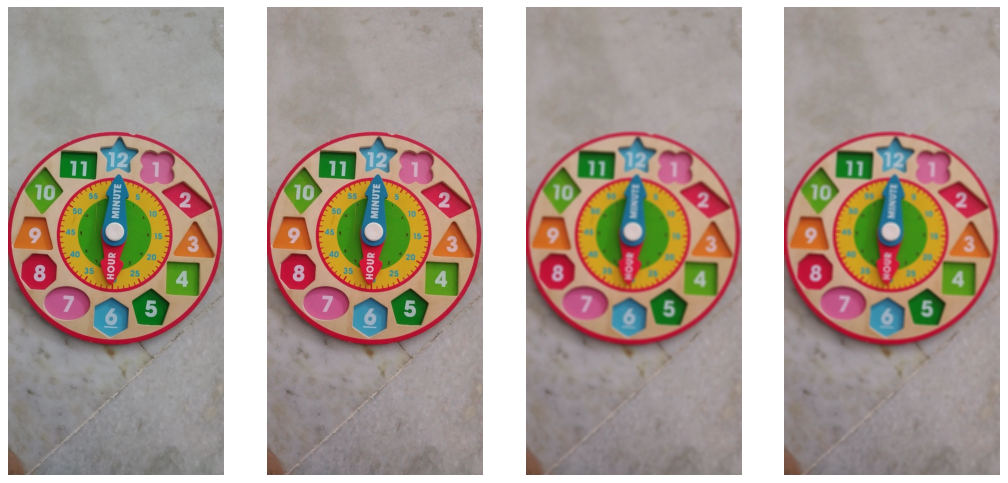

In [14]:
#display the original image and noisy version
plt.figure(num=None,figsize=(16,16),dpi=80)
plt.subplot(141)
plt.imshow(org_rgb)
plt.axis('off')
plt.subplot(142)
plt.imshow(noisy_rgb)
plt.axis('off')
plt.subplot(143)
plt.imshow(rec_rgb)
plt.axis('off')
plt.subplot(144)
plt.imshow(sharpned)
plt.axis('off')
plt.show()